# Train Interspeech

## Data

In [4]:
balanced = False

In [5]:
import pandas as pd

# Cargar el CSV para male
# data = pd.read_csv('data/data_male.csv')
data = pd.read_csv('data/balanced_pseudo_male.csv')

print(len(data))
# Eliminar filas con valores nulos solo en la columna 'text'
data = data.dropna(subset=['text'])
#data.to_csv('data/data_male.csv', index=False)
print(len(data))
data.head()

6384
6384


,FileName,text,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set,PodcastID,StratifyCol,NewPartition,PseudoEmo,InvEntropyNorm,PseudoEmoNum
0,MSP-PODCAST_4583_0017_0001,"from what it looks like, heidi was okay with j...",A,4.8,2.8,5.2,2357,Male,Train,4583,4583_2357_A,Train,A,1.0,2
1,MSP-PODCAST_3162_0475,gave them extra money and then they decided th...,A,6.2,2.6,6.2,2124,Male,Development,3162,3162_2124_A,Train,A,1.0,2
2,MSP-PODCAST_2355_0349,"yes, you're going to fucking die.",A,4.2,2.6,4.8,1601,Male,Train,2355,2355_1601_A,Test,A,1.0,2
3,MSP-PODCAST_5201_1197,and i already kind of had it in my mind,A,5.2,3.6,5.4,2789,Male,Development,5201,5201_2789_A,Train,A,1.0,2
4,MSP-PODCAST_5583_1543,i'm talking about a lot of you guys got to sta...,A,4.8,3.4,4.8,2953,Male,Train,5583,5583_2953_A,Train,A,1.0,2


In [6]:
if balanced:
    # Paso 1: Determinar el tamaño mínimo entre las clases
    min_count = data['PseudoEmo'].value_counts().min()

    # Paso 2: Submuestrear cada clase
    data = data.groupby('PseudoEmo').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

    # Paso 3: Verificar el balance
    print(data['PseudoEmo'].value_counts())
    print(len(data))

    #data.to_csv('data/balanced_pseudo_male.csv', index=False)


In [7]:
# Filtrar los datos en tres conjuntos basados en la columna 'Split_Set'
train_df = data.loc[data['NewPartition'] == 'Train']
dev_df = data.loc[data['NewPartition'] == 'Evaluation']
test_df = data.loc[data['NewPartition'] == 'Test']

# Verifica las primeras filas de cada conjunto
print("Conjunto Train:")
print(train_df.head())

print("Conjunto Development:")
print(dev_df.head())

print("Conjunto Test:")
print(test_df.head())

Conjunto Train:
                     FileName  \
0  MSP-PODCAST_4583_0017_0001   
1       MSP-PODCAST_3162_0475   
3       MSP-PODCAST_5201_1197   
4       MSP-PODCAST_5583_1543   
6       MSP-PODCAST_2736_0392   

                                                text EmoClass  EmoAct  EmoVal  \
0  from what it looks like, heidi was okay with j...        A     4.8     2.8   
1  gave them extra money and then they decided th...        A     6.2     2.6   
3            and i already kind of had it in my mind        A     5.2     3.6   
4  i'm talking about a lot of you guys got to sta...        A     4.8     3.4   
6  like you have an outside porch, like a screen ...        X     5.0     2.6   

   EmoDom  SpkrID Gender    Split_Set  PodcastID  StratifyCol NewPartition  \
0     5.2    2357   Male        Train       4583  4583_2357_A        Train   
1     6.2    2124   Male  Development       3162  3162_2124_A        Train   
3     5.4    2789   Male  Development       5201  5201_2789_A   

In [8]:
# # Establecer la semilla para garantizar reproducibilidad
# seed = 42

# # Seleccionar aleatoriamente las primeras N filas del conjunto de entrenamiento
# train_df = train_df.sample(n=1000, random_state=seed)

# # Seleccionar aleatoriamente las primeras N filas del conjunto de desarrollo
# dev_df = dev_df.sample(n=250, random_state=seed)

In [9]:
num_labels = 8
id2label = dict(zip(train_df["PseudoEmoNum"], train_df["PseudoEmo"]))
label2id = dict(zip(train_df["PseudoEmo"], train_df["PseudoEmoNum"]))
print(f"{id2label=}")
print(f"{label2id=}")

id2label={2: 'A', 4: 'C', 6: 'D', 7: 'F', 1: 'H', 0: 'N', 3: 'S', 5: 'U'}
label2id={'A': 2, 'C': 4, 'D': 6, 'F': 7, 'H': 1, 'N': 0, 'S': 3, 'U': 5}


In [10]:
# Convertir EmoClass a valores numéricos si es necesario
train_df['PseudoEmoNum'] = train_df['PseudoEmoNum'].astype(int)
dev_df['PseudoEmoNum'] = dev_df['PseudoEmoNum'].astype(int)
test_df['PseudoEmoNum'] = test_df['PseudoEmoNum'].astype(int)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_20221/2335822977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['PseudoEmoNum'] = train_df['PseudoEmoNum'].astype(int)
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_20221/2335822977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['PseudoEmoNum'] = dev_df['PseudoEmoNum'].astype(int)
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_20221/2335822977.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [11]:
from datasets import Dataset
from transformers import AutoTokenizer

# Modelo
model_ckpt = "distilbert-base-uncased"

# Cargar el tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Función para tokenizar los datos
def tokenize_function(examples):
    # Verificar que estamos pasando una lista de textos
    texts = examples['text']
    return tokenizer(texts, padding="max_length", truncation=True)

# Asegurarse de que 'train_df' y 'dev_df' son objetos Dataset de Hugging Face
train_dataset = Dataset.from_pandas(train_df)
dev_dataset = Dataset.from_pandas(dev_df)
test_dataset = Dataset.from_pandas(test_df)


# Tokenizamos ambos conjuntos de datos
train_dataset = train_dataset.map(tokenize_function, batched=True)
dev_dataset = dev_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


# Renombrar columna de labels
train_dataset = train_dataset.rename_column("PseudoEmoNum", "labels")
dev_dataset = dev_dataset.rename_column("PseudoEmoNum", "labels")
test_dataset = test_dataset.rename_column("PseudoEmoNum", "labels")


/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 2341/2341 [00:00<00:00, 15681.51 examples/s]


## Code

In [12]:
from transformers import AutoTokenizer
import torch
print(torch.__version__)  # Esto debería mostrarte la versión de PyTorch instalada

2.5.1


In [13]:
from transformers import AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)
print(model.num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


8


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Obtener reporte completo
    report = classification_report(labels, predictions, output_dict=True)
    
    # Obtener la matriz de confusión
    conf_matrix = confusion_matrix(labels, predictions)
    
    # Extraer métricas para cada clase y globales
    metrics = {
        'accuracy': report['accuracy'],
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score'],
        # 'weighted_precision': report['weighted avg']['precision'],
        # 'weighted_recall': report['weighted avg']['recall'],
        'confusion_matrix': conf_matrix.tolist()  # Convertir a lista para asegurarse de que es serializable si es necesario
    }
    
    # # Añadir métricas específicas por clase si se requiere
    # for label, scores in report.items():
    #     if label not in ["accuracy", "macro avg", "weighted avg"]:
    #         metrics[f'{label}_precision'] = scores['precision']
    #         metrics[f'{label}_recall'] = scores['recall']
    #         metrics[f'{label}_f1'] = scores['f1-score']
    #         metrics[f'{label}_support'] = scores['support']
    
    return metrics

In [15]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(train_dataset) // batch_size
model_name = f"{model_ckpt}-finetuned-male"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=10,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    #push_to_hub=True,
    log_level="error"
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    tokenizer=tokenizer
)

/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_20221/401939393.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [16]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Weighted F1,Confusion Matrix
1,2.039300,1.955937,0.280730,0.152808,0.194745,"[[65, 69, 87, 1, 0, 1, 0, 0], [32, 129, 53, 0, 1, 0, 0, 0], [18, 17, 149, 1, 0, 1, 0, 0], [42, 21, 72, 11, 0, 1, 0, 0], [15, 24, 73, 1, 0, 0, 0, 0], [25, 49, 54, 1, 0, 0, 0, 0], [13, 20, 81, 1, 0, 0, 0, 0], [31, 33, 65, 4, 0, 0, 0, 0]]"
2,1.884500,1.885899,0.298176,0.210458,0.248647,"[[150, 14, 25, 17, 13, 2, 2, 0], [107, 71, 21, 4, 8, 3, 1, 0], [43, 7, 107, 13, 7, 4, 5, 0], [77, 6, 25, 30, 0, 2, 7, 0], [52, 3, 34, 10, 9, 3, 2, 0], [69, 15, 21, 10, 9, 3, 2, 0], [47, 3, 40, 8, 4, 8, 5, 0], [75, 4, 26, 15, 5, 3, 4, 1]]"
3,1.719800,1.890555,0.296590,0.212874,0.251264,"[[95, 29, 14, 60, 9, 2, 14, 0], [73, 89, 22, 21, 5, 2, 3, 0], [21, 8, 92, 46, 3, 0, 16, 0], [36, 9, 8, 83, 2, 0, 9, 0], [23, 11, 37, 29, 3, 1, 9, 0], [39, 28, 17, 32, 4, 2, 7, 0], [18, 4, 39, 38, 4, 1, 10, 1], [45, 10, 21, 39, 6, 1, 11, 0]]"
4,1.564900,1.902008,0.279937,0.223741,0.257607,"[[96, 23, 24, 27, 30, 11, 7, 5], [74, 82, 20, 8, 15, 14, 2, 0], [22, 9, 94, 15, 19, 9, 15, 3], [46, 5, 19, 48, 8, 5, 13, 3], [27, 5, 33, 13, 18, 9, 7, 1], [40, 24, 19, 12, 24, 5, 3, 2], [20, 4, 37, 19, 19, 8, 8, 0], [47, 7, 23, 17, 22, 7, 8, 2]]"
5,1.411300,1.950539,0.287074,0.224452,0.259362,"[[92, 40, 17, 33, 22, 9, 6, 4], [66, 103, 13, 11, 11, 8, 2, 1], [22, 18, 85, 23, 13, 10, 13, 2], [44, 12, 16, 53, 6, 5, 8, 3], [25, 12, 30, 16, 10, 13, 6, 1], [38, 32, 16, 16, 12, 10, 3, 2], [19, 10, 31, 21, 13, 12, 7, 2], [46, 14, 19, 20, 10, 14, 8, 2]]"
6,1.264000,2.010786,0.283902,0.234721,0.267608,"[[90, 28, 13, 38, 21, 14, 12, 7], [62, 89, 12, 15, 12, 20, 5, 0], [22, 11, 78, 31, 10, 12, 18, 4], [39, 6, 9, 63, 7, 7, 13, 3], [24, 6, 26, 17, 11, 12, 13, 4], [38, 26, 13, 18, 10, 11, 10, 3], [17, 5, 26, 25, 13, 14, 13, 2], [41, 10, 17, 24, 10, 15, 13, 3]]"
7,1.150100,2.065200,0.278351,0.233786,0.265481,"[[89, 27, 18, 30, 29, 14, 11, 5], [65, 87, 11, 8, 17, 19, 4, 4], [21, 9, 81, 21, 18, 17, 17, 2], [39, 9, 16, 50, 7, 9, 14, 3], [22, 7, 25, 13, 18, 14, 9, 5], [39, 25, 14, 14, 16, 13, 5, 3], [17, 5, 29, 19, 16, 16, 10, 3], [39, 9, 18, 19, 17, 18, 10, 3]]"
8,1.033600,2.111439,0.267248,0.229264,0.258919,"[[91, 24, 16, 33, 23, 15, 12, 9], [70, 73, 11, 8, 14, 28, 5, 6], [22, 5, 78, 27, 16, 18, 17, 3], [41, 8, 14, 50, 8, 7, 14, 5], [22, 7, 27, 14, 12, 11, 13, 7], [41, 19, 14, 15, 15, 13, 8, 4], [17, 4, 26, 18, 18, 14, 14, 4], [40, 6, 18, 21, 15, 18, 9, 6]]"
9,0.955600,2.140264,0.270420,0.239198,0.267032,"[[82, 23, 17, 31, 26, 17, 15, 12], [59, 75, 13, 9, 20, 28, 4, 7], [20, 5, 79, 24, 19, 19, 17, 3], [37, 7, 17, 48, 8, 12, 13, 5], [15, 7, 28, 14, 15, 14, 11, 9], [33, 18, 15, 13, 17, 19, 7, 7], [15, 4, 26, 18, 18, 17, 14, 3], [35, 7, 18, 21, 15, 20, 8, 9]]"
10,0.907800,2.151096,0.272799,0.239095,0.268730,"[[85, 23, 17, 30, 25, 18, 15, 10], [59, 78, 12, 10, 17, 27, 5, 7], [20, 5, 79, 24, 18, 19, 16, 5], [36, 9, 15, 49, 8, 10, 13, 7], [14, 7, 26, 14, 13, 16, 13, 10], [34, 19, 15, 15, 15, 17, 8, 6], [15, 4, 25, 18, 17, 17, 15, 4], [36, 7, 17, 21, 15, 20, 9, 8]]"


/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

TrainOutput(global_step=870, training_loss=1.3878962330434514, metrics={'train_runtime': 3091.1809, 'train_samples_per_second': 9.0, 'train_steps_per_second': 0.281, 'total_flos': 3685637357076480.0, 'train_loss': 1.3878962330434514, 'epoch': 10.0})

In [17]:
preds_output = trainer.predict(test_dataset)
preds_metrics = preds_output.metrics
preds_metrics

{'test_loss': 2.3018150329589844,
 'test_accuracy': 0.20589491670226398,
 'test_macro_f1': 0.20725929515121927,
 'test_weighted_f1': 0.2041858302158275,
 'test_confusion_matrix': [[35, 19, 8, 17, 14, 16, 3, 9],
  [42, 81, 10, 12, 12, 20, 1, 5],
  [17, 10, 56, 25, 21, 17, 25, 18],
  [74, 23, 36, 98, 15, 23, 27, 26],
  [75, 30, 82, 60, 60, 42, 37, 23],
  [88, 68, 34, 44, 32, 49, 15, 13],
  [54, 15, 92, 62, 49, 49, 67, 24],
  [79, 28, 40, 83, 36, 27, 33, 36]],
 'test_runtime': 68.6133,
 'test_samples_per_second': 34.119,
 'test_steps_per_second': 1.079}

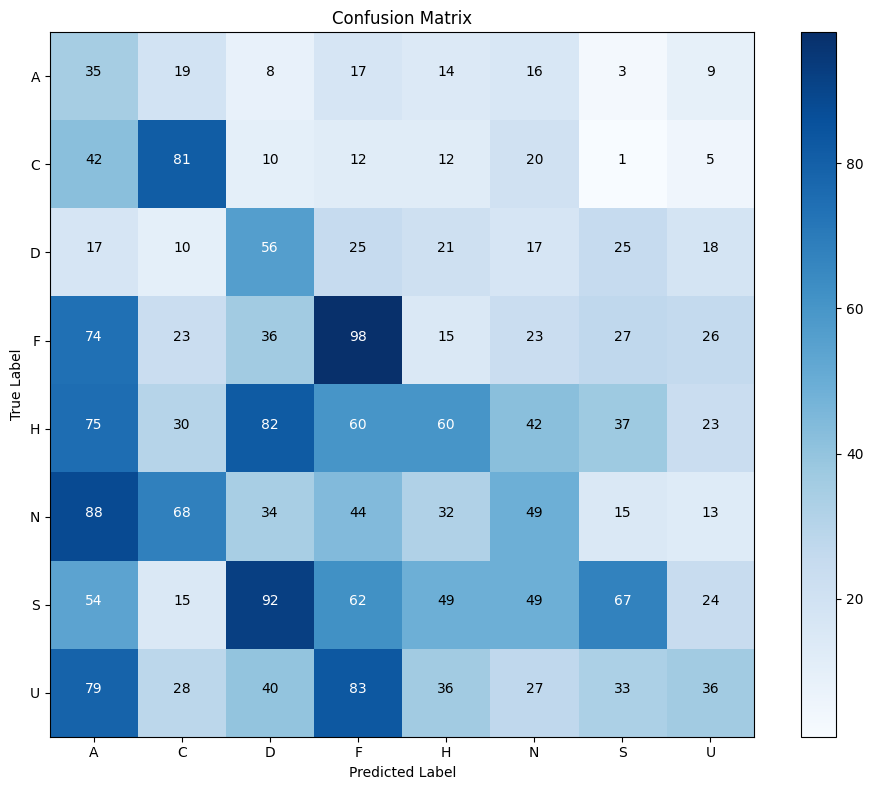

In [18]:
import matplotlib.pyplot as plt
import numpy as np

labels = label2id.keys()
conf_matrix = preds_metrics['test_confusion_matrix']

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Agregar etiquetas
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Rótulos de valores dentro de cada celda
conf_matrix = np.array(conf_matrix)

# Calcular el umbral
thresh = conf_matrix.max() / 2
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(
        j, i, format(conf_matrix[i, j], 'd'),
        horizontalalignment="center",
        color="white" if conf_matrix[i, j] > thresh else "black"
    )

# Etiquetas de los ejes
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()